# K-Nearest Neighbor whether a person will have diabetes or not 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')
print(len(df))
df.head()


768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
#replacing Zeroes
zeroes=['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for i in zeroes:
    df[i]=df[i].replace(0,np.NaN)
    mean=int (df[i].mean(skipna=True))
    df[i]=df[i].replace(np.NaN,mean)


In [5]:
#splitting Datasets first training and testing 
x =df.iloc[:,0:8] #extracting independent variables 
y=df.iloc[:,8]     #o/p ,extracting dependent variables
x_train, x_test, y_train, y_test = train_test_split(x, y ,random_state = 0, test_size = 0.2)
print("Training and testing split was successful")


Training and testing split was successful


In [6]:
#feature scaling/ data scaling
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [7]:
import math
print(len(y))
print(math.sqrt(len(y_train)))
print(math.sqrt(len(y_test)))#get an odd no for testing so 11

768
24.779023386727733
12.409673645990857


In [8]:
#Initializing the KNN model
knn=KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')

In [9]:
knn.fit(x_train,y_train) # fit the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [10]:
#for getting the predictions using the classifier fitted above
from sklearn import metrics
y_pred = knn.predict(x_test)
y_pred
print(metrics.accuracy_score(y_test, y_pred))

0.8181818181818182


In [11]:
#Evaluating Model
conf_matrix=confusion_matrix(y_test,y_pred) #summary on prediction results on classification model
print(conf_matrix)
#       | predicted | predicted
#actual |    tp       |   fn
#actual |    fp     |     tn
#primary diagonal is the correct ones and secondary diagonal is wrong ones

[[94 13]
 [15 32]]


In [12]:
#f1 score
f1=f1_score(y_test,y_pred)
print(f1)

0.6956521739130436


In [13]:
#Accuracy
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8181818181818182


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

   micro avg       0.82      0.82      0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



[0.7532467532467533, 0.7467532467532467, 0.7857142857142857, 0.7987012987012987, 0.7597402597402597, 0.7857142857142857, 0.7922077922077922, 0.8181818181818182, 0.7987012987012987, 0.8051948051948052, 0.8181818181818182, 0.7987012987012987, 0.8181818181818182, 0.7987012987012987, 0.8116883116883117, 0.7857142857142857, 0.7857142857142857, 0.7922077922077922, 0.7792207792207793, 0.7857142857142857, 0.7792207792207793, 0.7922077922077922, 0.7857142857142857, 0.7857142857142857, 0.7922077922077922, 0.7792207792207793, 0.8181818181818182, 0.8051948051948052, 0.7987012987012987, 0.7987012987012987, 0.7987012987012987]


Text(0, 0.5, 'Testing Accuracy')

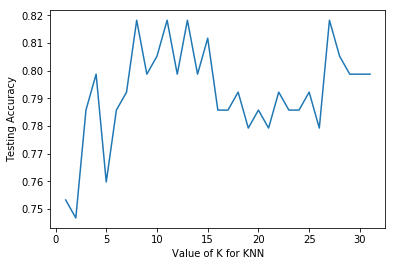

In [15]:
# try K=1 through K=31 and record testing accuracy
k_range = range(1, 32)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# How to use GridSearchCV in this knn example

In [16]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,32))
grid_params={#'n_neighbors':[7,11,19,23,29,31,37],
            'n_neighbors':list(range(1,32)),
             'weights':['uniform', 'distance'], 
             'metric': ['euclidean','manhattan']}


grid=GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
#total 7*2*3*4 = 168 times the model will be running
grid_results = grid.fit(x_train, y_train)
print("\n")
print(grid_results)


Fitting 5 folds for each of 124 candidates, totalling 620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min




GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)


[Parallel(n_jobs=-1)]: Done 620 out of 620 | elapsed:  1.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
#print(grid.cv_results_)
#we are interested just in mean_test_score for a strict evaluation of the hyper-parameters' performances, 
#but mean_train_score can help us figure out how much the model has fitted the data using certain parameters 
#and how much this is relative to test data (for instance by building a validation curve plot

print('Parameters:\n',grid.cv_results_['params'])
print("\n\n")
print(grid.cv_results_['mean_train_score'])
print("\n\n")

print(grid.cv_results_['mean_test_score'])
print("\n")
print('Mean Train Score :', grid.cv_results_['mean_train_score'].mean())
print("\n")
print('Mean Test Score :', grid.cv_results_['mean_test_score'].mean())


Parameters:
 [{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}, {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}, {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}, {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}, {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}, {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}, {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}, {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}, {'me

[1.         1.         0.83509154 1.         0.83916653 1.
 0.81351617 1.         0.81555284 1.         0.79762771 1.
 0.79641068 1.         0.79233486 1.         0.80047821 1.
 0.78338184 1.         0.78745683 1.         0.7825738  1.
 0.78298196 1.         0.77930933 1.         0.77849965 1.
 0.77564831 1.         0.78256799 1.         0.77605315 1.
 0.78542594 1.         0.77239959 1.         0.78094446 1.
 0.77117096 1.         0.7768703  1.         0.76790981 1.
 0.76995144 1.         0.76220798 1.         0.76181226 1.
 0.75936412 1.         0.76303011 1.         0.75366643 1.
 0.7593691  1.         1.         1.         0.83549804 1.
 0.84160059 1.         0.80781932 1.         0.80577188 1.
 0.79070386 1.         0.80659483 1.         0.79640737 1.
 0.80984603 1.         0.7943707  1.         0.79314787 1.
 0.77930934 1.         0.78378917 1.         0.77889454 1.
 0.78378668 1.         0.77686699 1.         0.78175747 1.
 0.77564913 1.         0.77850544 1.         0.77034801 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

In [ ]:
from sklearn.metrics import accuracy_score

scores = []
for i in k_range:
    model = KNeighborsClassifier(metric = "euclidean", n_neighbors = i , weights = "distance")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
    
plt.plot(k_range,scores)